In [27]:
import pandas as pd
import re

# Import de NTLK et du corpus inaugural
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guill\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# Import bible csv
bible_df = pd.read_csv('bible.csv')

In [29]:
# Stats descriptives sur le dataframe
bible_df.rename(columns={
    'b': 'book_id', 
    'c': 'chapter_id',
    'v': 'verse_id',
    't': 'text'
    }, inplace=True)

bible_df

,id,book_id,chapter_id,verse_id,text
0,1001001,1,1,1,In the beginning God created the heaven and th...
1,1001002,1,1,2,"And the earth was without form, and void; and ..."
2,1001003,1,1,3,"And God said, Let there be light: and there wa..."
3,1001004,1,1,4,"And God saw the light, that it was good: and G..."
4,1001005,1,1,5,"And God called the light Day, and the darkness..."
...,...,...,...,...,...
31098,66022017,66,22,17,"And the Spirit and the bride say, Come. And le..."
31099,66022018,66,22,18,For I testify unto every man that heareth the ...
31100,66022019,66,22,19,And if any man shall take away from the words ...
31101,66022020,66,22,20,"He which testifieth these things saith, Surely..."


In [30]:
# Now, clean !

# Use lambda to apply the function to each row of the DataFrame
def remove_all_punctuation(text):
   return re.sub(r'[^\w\s]', ' ', text)

def remove_partial_punctuation(text): # except .!?
   return re.sub(r'[^\w\s.!?]', ' ', text)

def carriage_return(text):
   return re.sub(r'\n', ' ', text)

def remove_double_space(text): # remove when more than 2 spaces
   return re.sub(r'[ ]{2,}', ' ', text)

def remove_empty_strings(text):
    return list(filter(None, text))

def remove_stopwords(text):
   text = tokenize(text)
   filtered_words = [word for word in text if word.lower() not in stopwords.words('english')]
   return filtered_words

def tokenize(text):
   return text.split(' ')

def join(text):
   return ' '.join(text)

def lemmatize(text):
    WNlemma = nltk.WordNetLemmatizer()
    lemmatized = []
    for token in text:
        lemmatized.append(WNlemma.lemmatize(token))
    return lemmatized

def remove_numbers(text):
    numbers = '0123456789'
    for number in numbers:
        text = text.replace(number, '')
    return text

def remove_short_words(word_list):
    return [word for word in word_list if len(word) > 1]

In [31]:
# Text without stopwords
bible_df['cleaned'] = bible_df['text'] \
   .apply(lambda x: remove_stopwords(x)) \
   .apply(lambda x: join(x)) \
   .apply(lambda x: carriage_return(x)) \
   .apply(lambda x: remove_double_space(x)) \
   .apply(lambda x: x.lower()) \
   .apply(lambda x: remove_all_punctuation(x)) \
   .apply(lambda x: remove_numbers(x)) \
   .apply(lambda x: tokenize(x)) \
   .apply(lambda x: remove_empty_strings(x)) \
   .apply(lambda x: lemmatize(x)) \
   .apply(lambda x: remove_short_words(x))
   
# Test cleaning efficiency printing the dataframe
bible_df

KeyboardInterrupt: 

<Axes: xlabel='book_id', ylabel='chapter_id'>

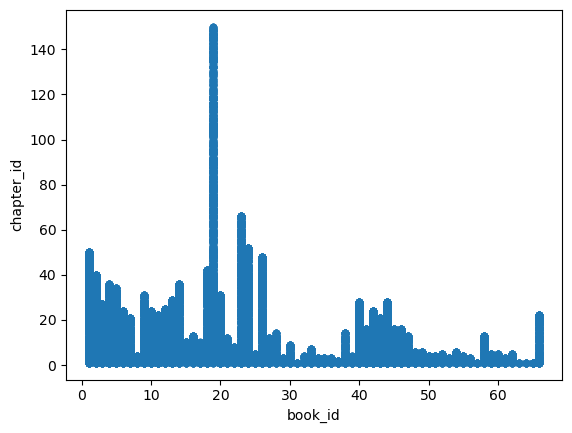

In [ ]:
bible_df.plot(x='book_id', y='chapter_id', kind='scatter')
# book_id = représente le livre de la bible (1 = Genèse, 2 = Exode, 3= Lévitique, etc.)


In [ ]:
#ceci est un test 

# Statistiques du texte (avec visualisations)

In [ ]:
# Add descriptive columns
bible_df['word_count'] = bible_df['cleaned'].apply(lambda x: len(' '.join(x).split()))
bible_df['unique_words'] = bible_df['cleaned'].apply(lambda x: len(set(x)))
bible_df['avg_word_length'] = bible_df['cleaned'].apply(lambda x: sum(len(word) for word in x) / len(x) if len(x) > 0 else 0) 
bible_df['sentence_count'] = bible_df['text'].apply(lambda x: x.count('.') + x.count('!') + x.count('?'))

bible_df



,id,book_id,chapter_id,verse_id,text,cleaned,word_count,unique_words,avg_word_length,sentence_count
0,1001001,1,1,1,In the beginning God created the heaven and th...,"[beginning, god, created, heaven, earth]",5,5,6.000000,1
1,1001002,1,1,2,"And the earth was without form, and void; and ...","[earth, without, form, void, darkness, upon, f...",14,12,4.785714,2
2,1001003,1,1,3,"And God said, Let there be light: and there wa...","[god, said, let, light, light]",5,4,4.000000,1
3,1001004,1,1,4,"And God saw the light, that it was good: and G...","[god, saw, light, good, god, divided, light, d...",8,6,4.750000,1
4,1001005,1,1,5,"And God called the light Day, and the darkness...","[god, called, light, day, darkness, called, ni...",11,9,5.272727,2
...,...,...,...,...,...,...,...,...,...,...
31098,66022017,66,22,17,"And the Spirit and the bride say, Come. And le...","[spirit, bride, say, come, let, heareth, say, ...",18,13,4.666667,4
31099,66022018,66,22,18,For I testify unto every man that heareth the ...,"[testify, unto, every, man, heareth, word, pro...",20,14,4.700000,0
31100,66022019,66,22,19,And if any man shall take away from the words ...,"[man, shall, take, away, word, book, prophecy,...",19,14,4.421053,1
31101,66022020,66,22,20,"He which testifieth these things saith, Surely...","[testifieth, thing, saith, surely, come, quick...",12,11,5.000000,3


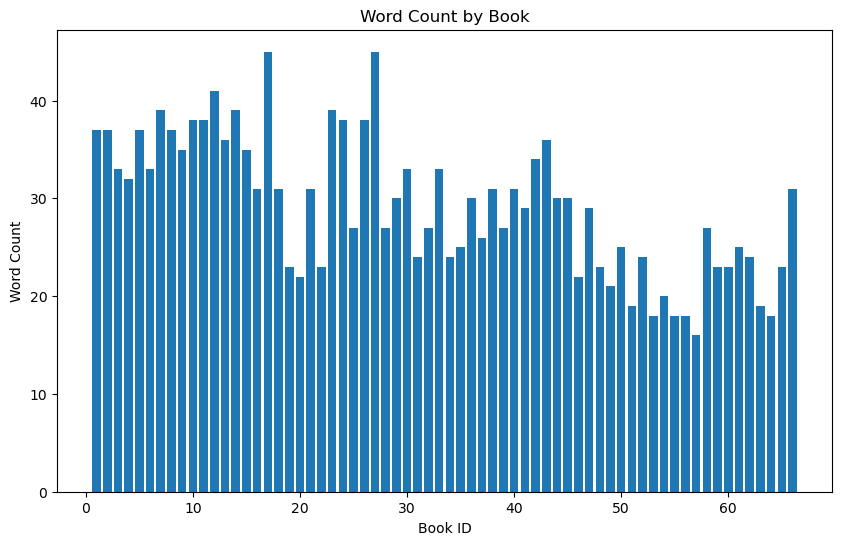

In [ ]:
# Nombres de mots par livre de la bible

import matplotlib.pyplot as plt

# Graph 1: Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(bible_df['book_id'], bible_df['word_count'])
plt.xlabel('Book ID')
plt.ylabel('Word Count')
plt.title('Word Count by Book')
plt.show()



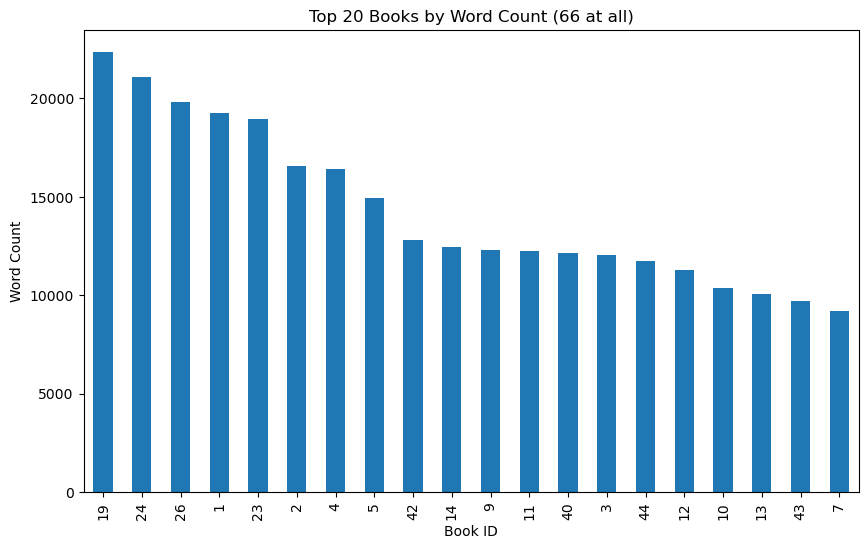

In [ ]:
# Top des livres par nombre de mots (top 20) pour la lisibilité
top_10_books = bible_df.groupby('book_id')['word_count'].sum().nlargest(20)
top_10_books
top_10_books.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Book ID')
plt.ylabel('Word Count')
plt.title('Top 20 Books by Word Count (66 at all)')
plt.show()


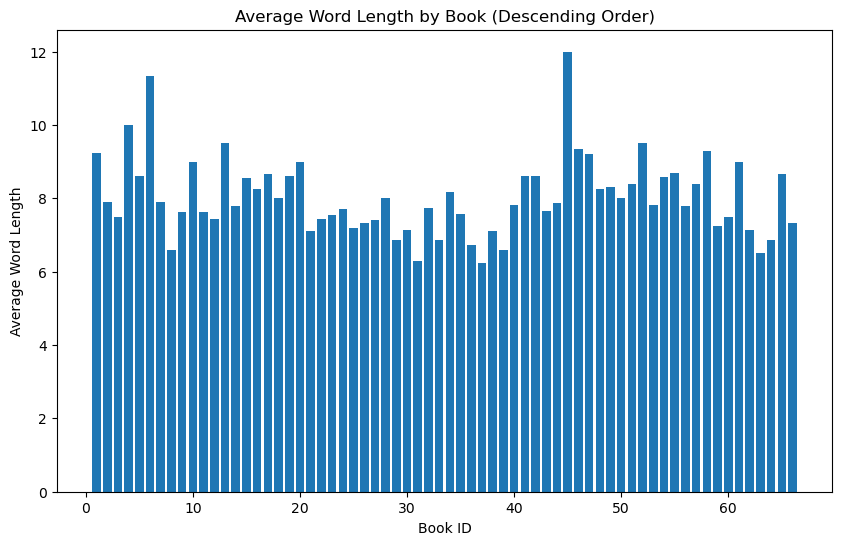

In [ ]:
# Nombres de mots par livre de la bible 
plt.figure(figsize=(10, 6))
bible_df_sorted = bible_df.sort_values('avg_word_length')
plt.bar(bible_df_sorted['book_id'], bible_df_sorted['avg_word_length'])
plt.xlabel('Book ID')
plt.ylabel('Average Word Length')
plt.title('Average Word Length by Book (Descending Order)')
plt.show()


## 2. Nettoyage des données

Définition de plusieurs fonctions de nettoyage des données, et application de ces dernières sur différentes colonnes du dataframe, correspondant à un niveau de nettoyage différent qui sera utile pour les prochaines étapes. 

In [ ]:
import re

# Use lambda to apply the function to each row of the DataFrame
def remove_all_punctuation(text):
    return re.sub(r'[^\w\s]', ' ', text)

def remove_partial_punctuation(text): # except .!?
    return re.sub(r'[^\w\s.!?]', ' ', text)

def carriage_return(text):
    return re.sub(r'\n', ' ', text)

def remove_double_space(text): # remove when more than 2 spaces
    return re.sub(r'[ ]{2,}', ' ', text)

def remove_empty_strings(text):
     return list(filter(None, text))

def remove_stopwords(text):
    text = tokenize(text)
    filtered_words = [word for word in text if word.lower() not in stopwords.words('english')]
    return filtered_words

def tokenize(text):
    return text.split(' ')

def join(text):
    return ' '.join(text)

def lemmatize(text):
     WNlemma = nltk.WordNetLemmatizer()
     lemmatized = []
     for token in text:
          lemmatized.append(WNlemma.lemmatize(token))
     return lemmatized

def remove_numbers(text):
     numbers = '0123456789'
     for number in numbers:
          text = text.replace(number, '')
     return text

def remove_single_letter_words(text):
    filtered_words = [word for word in text if len(word) > 1]
    return filtered_words

bible_df_cleaned = bible_df.copy()

# Text without stopwords
bible_df_cleaned['text_without_stopwords'] = bible_df_cleaned['text'] \
    .apply(lambda x: remove_stopwords(x)) \
    .apply(lambda x: join(x)) \
    .apply(lambda x: carriage_return(x)) \
    .apply(lambda x: remove_double_space(x))

# Clean text partially for later
bible_df_cleaned['text_partially_cleaned'] = bible_df_cleaned['text_without_stopwords'] \
    .apply(lambda x: remove_partial_punctuation(x)) \
    .apply(lambda x: remove_double_space(x)) \
    .apply(lambda x: x.lower()) \

# Advanced cleaning
bible_df_cleaned['text'] = bible_df_cleaned['text_partially_cleaned'] \
    .apply(lambda x: remove_all_punctuation(x)) \
    .apply(lambda x: remove_numbers(x)) \
    .apply(lambda x: remove_double_space(x)) \
    .apply(lambda x: tokenize(x)) \
    .apply(lambda x: remove_single_letter_words(x)) \
    .apply(lambda x: remove_empty_strings(x)) \
    .apply(lambda x: lemmatize(x))

# Test cleaning efficiency printing the dataframe
bible_df_cleaned


,id,book_id,chapter_id,verse_id,text,cleaned,word_count,unique_words,avg_word_length,sentence_count,text_without_stopwords,text_partially_cleaned
0,1001001,1,1,1,"[beginning, god, created, heaven, earth]","[beginning, god, created, heaven, earth]",5,5,6.000000,1,beginning God created heaven earth.,beginning god created heaven earth.
1,1001002,1,1,2,"[earth, without, form, void, darkness, upon, f...","[earth, without, form, void, darkness, upon, f...",14,12,4.785714,2,"earth without form, void; darkness upon face d...",earth without form void darkness upon face dee...
2,1001003,1,1,3,"[god, said, let, light, light]","[god, said, let, light, light]",5,4,4.000000,1,"God said, Let light: light.",god said let light light.
3,1001004,1,1,4,"[god, saw, light, good, god, divided, light, d...","[god, saw, light, good, god, divided, light, d...",8,6,4.750000,1,"God saw light, good: God divided light darkness.",god saw light good god divided light darkness.
4,1001005,1,1,5,"[god, called, light, day, darkness, called, ni...","[god, called, light, day, darkness, called, ni...",11,9,5.272727,2,"God called light Day, darkness called Night. e...",god called light day darkness called night. ev...
...,...,...,...,...,...,...,...,...,...,...,...,...
31098,66022017,66,22,17,"[spirit, bride, say, come, let, heareth, say, ...","[spirit, bride, say, come, let, heareth, say, ...",18,13,4.666667,4,"Spirit bride say, Come. let heareth say, Come....",spirit bride say come. let heareth say come. l...
31099,66022018,66,22,18,"[testify, unto, every, man, heareth, word, pro...","[testify, unto, every, man, heareth, word, pro...",20,14,4.700000,0,testify unto every man heareth words prophecy ...,testify unto every man heareth words prophecy ...
31100,66022019,66,22,19,"[man, shall, take, away, word, book, prophecy,...","[man, shall, take, away, word, book, prophecy,...",19,14,4.421053,1,"man shall take away words book prophecy, God s...",man shall take away words book prophecy god sh...
31101,66022020,66,22,20,"[testifieth, thing, saith, surely, come, quick...","[testifieth, thing, saith, surely, come, quick...",12,11,5.000000,3,"testifieth things saith, Surely come quickly. ...",testifieth things saith surely come quickly. a...


In [ ]:
# Test cleaning efficiency printing the first row
# cela permet de comparer les différentes étapes de nettoyage

print('Cleaned text: \n' + str(bible_df_cleaned['text'][0]))
print('Partially cleaned text (without puncutation except points):\n' + str(bible_df_cleaned['text_partially_cleaned'][0]))
print('Text without stopwords and carriage return: \n' + str(bible_df_cleaned['text_without_stopwords'][0]))


Cleaned text: 
['beginning', 'god', 'created', 'heaven', 'earth']
Partially cleaned text (without puncutation except points):
beginning god created heaven earth.
Text without stopwords and carriage return: 
beginning God created heaven earth.


## 3.Analyse des données

### Analyse des mots les plus fréquents

In [ ]:
from collections import Counter

# Concatenate all the cleaned text into a single string
all_text = ' '.join(bible_df_cleaned['text'].sum())

# Count the frequency of each word in the text
word_counts = Counter(all_text.split())

# Get the top 10 most common words
top_words = word_counts.most_common(10)

# Print the top words
for word, count in top_words:
    print(f'{word}: {count}')


shall: 9838
unto: 8997
lord: 8006
thou: 5474
god: 4716
thy: 4600
said: 3999
ye: 3982
thee: 3827
him: 3493


In [ ]:
#Number of words in the bible
print("Number of words in the bible : ", len(bible_df_cleaned))

Number of words in the bible :  31103


In [ ]:
unique_words = len(bible_df_cleaned['text'].explode().unique())
print("Number of unique words in the Bible:", unique_words)


Number of unique words in the Bible: 11389


In [ ]:
# Count the number of times "Jesus" appears in the Bible
jesus_count = bible_df_cleaned['text'].explode().str.count('jesus').sum()

# Print the result
print("Number of times 'Jesus' appears in the Bible:", jesus_count)


Number of times 'Jesus' appears in the Bible: 984.0


In [ ]:
god_count = bible_df_cleaned['text'].explode().str.count('god').sum()
print("Number of times 'God' appears in the Bible:", god_count)


Number of times 'God' appears in the Bible: 4787.0


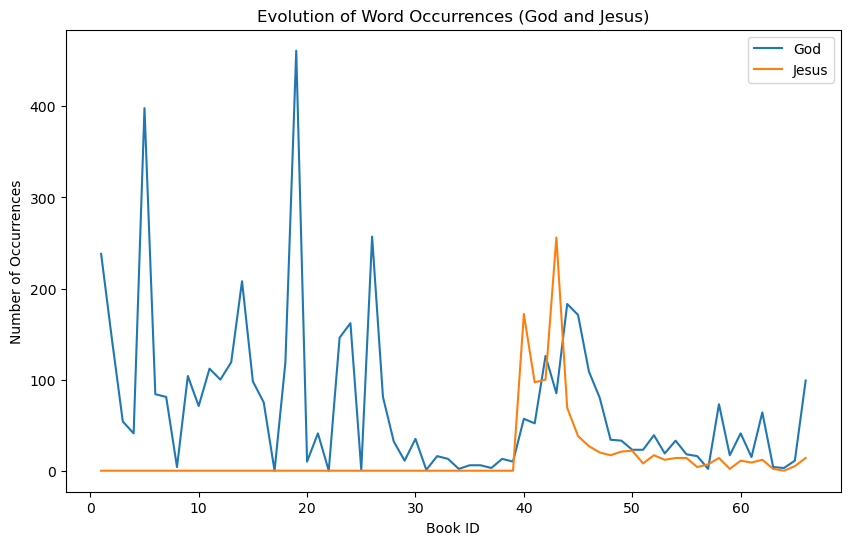

In [ ]:
import matplotlib.pyplot as plt

# Group the dataframe by book_id and calculate the sum of occurrences for each word
god_counts = bible_df_cleaned.groupby('book_id')['text'].apply(lambda x: x.explode().str.count('god').sum())
jesus_counts = bible_df_cleaned.groupby('book_id')['text'].apply(lambda x: x.explode().str.count('jesus').sum())

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(god_counts.index, god_counts.values, label='God')
plt.plot(jesus_counts.index, jesus_counts.values, label='Jesus')
plt.xlabel('Book ID')
plt.ylabel('Number of Occurrences')
plt.title('Evolution of Word Occurrences (God and Jesus)')
plt.legend()
plt.show()




In [ ]:
# Filter the dataframe to include only books 1 to 37
filtered_df = bible_df_cleaned[(bible_df_cleaned['book_id'] >= 1) & (bible_df_cleaned['book_id'] <= 37)]

# Count the occurrences of the word "jesus" in the filtered dataframe
jesus_count = filtered_df['text'].explode().str.count('jesus').sum()

# Print the result
print("Number of times 'Jesus' appears between books 1 and 30:", jesus_count)


Number of times 'Jesus' appears between books 1 and 30: 0


In [ ]:
## 4. Transformation des données
### POS Tagging

In [32]:
# for each inaugural discourse, tokenize sentence by sentence 
bible_df_cleaned['text_partially_cleaned_tokenized'] = bible_df_cleaned['text_without_stopwords'].apply(lambda x: nltk.sent_tokenize(x))

def pos_tagging_for_corpus(corpus):
    result = []
    for sentence in corpus:
        words = nltk.word_tokenize(sentence)
        pos_tags = nltk.pos_tag(words)
        result.append(pos_tags)
    return result

bible_df_cleaned['text_pos_processed'] = bible_df_cleaned['text_partially_cleaned_tokenized'].apply(lambda x: pos_tagging_for_corpus(x))

bible_df_cleaned['text_pos_processed']


0        [[(beginning, VBG), (God, NNP), (created, VBD)...
1        [[(earth, NN), (without, IN), (form, NN), (,, ...
2        [[(God, NNP), (said, VBD), (,, ,), (Let, NNP),...
3        [[(God, NNP), (saw, VBD), (light, JJ), (,, ,),...
4        [[(God, NNP), (called, VBD), (light, JJ), (Day...
                               ...                        
31098    [[(Spirit, NNP), (bride, NN), (say, VBP), (,, ...
31099    [[(testify, VB), (unto, JJ), (every, DT), (man...
31100    [[(man, NN), (shall, MD), (take, VB), (away, R...
31101    [[(testifieth, JJ), (things, NNS), (saith, NN)...
31102    [[(grace, NN), (Lord, NNP), (Jesus, NNP), (Chr...
Name: text_pos_processed, Length: 31103, dtype: object

### NER 

In [33]:
# Downloading ressources 
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Tokenisation et POS tagging
tokens = bible_df_cleaned['text_partially_cleaned_tokenized']
pos_tags = bible_df_cleaned['text_pos_processed']

print(tokens[0])
print(pos_tags[0])

['beginning God created heaven earth.']
[[('beginning', 'VBG'), ('God', 'NNP'), ('created', 'VBD'), ('heaven', 'RB'), ('earth', 'NN'), ('.', '.')]]


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\guill\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\guill\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [36]:
# Retourne une liste de tuples contenant les entités nommées et leurs types associés à partir d'un corpus de phrases, en réutilisant le traitement effectué précédemment dans le POS
def get_named_entities(corpus_pos_tagged):
    named_entities = []

    for sentence_pos_tagged in corpus_pos_tagged:
        sentence = [pos_tuple for pos_tuple in sentence_pos_tagged]
        ner_tree = nltk.ne_chunk(sentence)
        
        for subtree in ner_tree:

            if isinstance(subtree, nltk.Tree) and subtree.label() != 'S':
                entity = " ".join([word for word, tag in subtree.leaves()])
                entity_type = subtree.label()
                named_entities.append((entity, entity_type))

    return named_entities

bible_df_cleaned['named_entities'] = bible_df_cleaned['text_pos_processed'].apply(lambda x: get_named_entities(x))

# cela pemet en fait de récupérer les entités nommées et leurs types associés à partir d'un corpus de phrases, 
# en réutilisant le traitement effectué précédemment dans le POS
#

### Bag of Words 

In [37]:
# get all uniques words and add them to a dataframe

cleaned_corpus = bible_df_cleaned['text'].apply(lambda x: ' '.join(x))

from sklearn.feature_extraction.text import CountVectorizer

# get bag of words features in sparse format
cv = CountVectorizer()
cv_matrix = cv.fit_transform(cleaned_corpus)

cv_matrix1 = cv_matrix.toarray()
cv_matrix1

# get all unique words in the corpus
vocab = cv.get_feature_names_out()
# show document feature vectors
bible_df_feature_vectors = pd.DataFrame(cv_matrix1, columns=vocab)

bible_df_feature_vectors

,aaron,aaronites,abaddon,abagtha,abana,abarim,abase,abased,abasing,abated,...,zorathites,zoreah,zorites,zorobabel,zuar,zuph,zur,zuriel,zurishaddai,zuzims
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### N-Gram Model

Récupération des bi-grammes et tri-grammes les plus intéressants, avec une occurence tous textes confondus supérieure à 30

In [38]:
bv = CountVectorizer(ngram_range=(2,3))
bv_matrix = bv.fit_transform(cleaned_corpus)
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names_out()
bible_df_bigram_trigram = pd.DataFrame(bv_matrix, columns=vocab)
bible_df_bigram_trigram

# Delete columns with less than 25 occurences everywhere 
df_inaugural_corpus_bigram_trigram = bible_df_bigram_trigram.loc[:, (bible_df_bigram_trigram.sum(axis=0) >= 30)]

# Add year column to the dataframe as index
bible_bigram_trigram.insert(0, 'year', bible_df_bigram_trigram['year'].values)
bible_bigram_trigram

# Plot the most common bigrams and trigrams by year
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.ylabel('Inaugural words count')
plt.xlabel('Year') 
plt.title('Most common bigrams and trigrams by year of the inaugural discourses')
plt.subplots_adjust(bottom=0.15)
plt.xticks(rotation=90)
# make one plot for each bigram and trigram
for column in bible_bigram_trigram.drop(columns=['year']).columns:
    plt.plot(bible_bigram_trigram['year'], bible_df_bigram_trigram[column])

# add legend    
plt.legend(bible_bigram_trigram.drop(columns=['year']).columns, loc='upper left')


bible_bigram_trigram



MemoryError: Unable to allocate 101. GiB for an array with shape (31103, 437696) and data type int64

### TF-IDF

In [39]:
# Import des librairies
import scipy.sparse as sp
import numpy as np

# Reuse BOW from before
feature_names = list(bible_df_feature_vectors.columns)
# build the document frequency matrix
df = np.diff(sp.csc_matrix(bible_df_feature_vectors, copy=True).indptr)
df = 1 + df # adding 1 to smoothen idf later
# show smoothened document frequencies
pd.DataFrame([df], columns=feature_names)

,aaron,aaronites,abaddon,abagtha,abana,abarim,abase,abased,abasing,abated,...,zorathites,zoreah,zorites,zorobabel,zuar,zuph,zur,zuriel,zurishaddai,zuzims
0,332,3,2,2,2,5,5,5,2,7,...,2,2,2,4,6,4,6,2,6,2


In [40]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer().fit(bible_df_feature_vectors)
len(vect.get_feature_names_out())

11386

In [42]:
X_vectorized = vect.transform(bible_df_feature_vectors)

In [43]:
feature_names = np.array(vect.get_feature_names_out())

sorted_tfidf_index = X_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['aaron' 'pirathonite' 'pisgah' 'pisidia' 'pison' 'pispah' 'piss'
 'pisseth' 'pit' 'pirathon']

Largest tfidf: 
['zuzims' 'fleshly' 'flagon' 'flag' 'fixed' 'five' 'fitteth' 'fitted'
 'fitly' 'fitch']


# Clustering

In [45]:
# TF-IDF with fit_transform
# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000, stop_words='english')

# Fit and transform the complaints text to create embeddings
tfidf_matrix = tfidf_vectorizer.fit_transform(bible_df_cleaned['text'].apply(lambda x: " ".join(x)))
 
tfidf_matrix.shape


(31103, 1000)

In [46]:
from sklearn.decomposition import PCA
 
# Initialize PCA and reduce dimensionality to 2 components
pca = PCA(n_components=2)
reduced_tfidf = pca.fit_transform(tfidf_matrix.toarray())
 
reduced_tfidf.shape

(31103, 2)

c:\Users\guill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\guill\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\guill\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
c:\Users\guill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the 

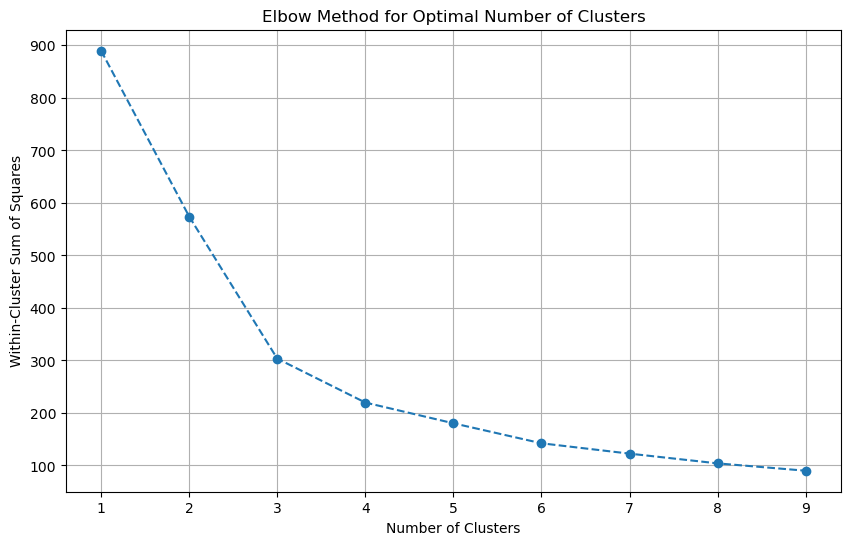

In [47]:
# Test d'Elbow pour déterminer le nombre optimal de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
# Determine the optimal number of clusters using the Elbow method
scores = []  # within-cluster sum of squares
cluster_range = range(1, 10)  # test up to 10 clusters
 
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(reduced_tfidf)
    scores.append(kmeans.inertia_)
 
#Plot the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

c:\Users\guill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


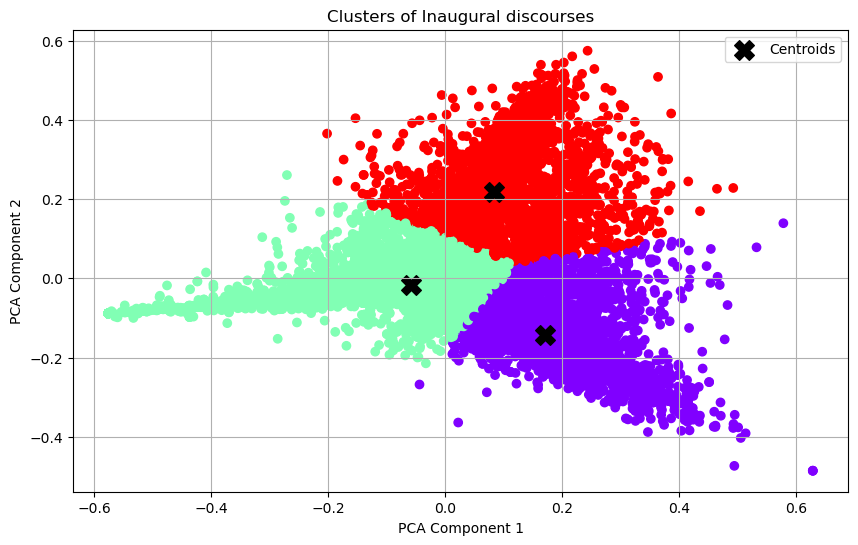

In [48]:
# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=100)
clusters = kmeans.fit_predict(reduced_tfidf)
 
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_tfidf[:, 0], reduced_tfidf[:, 1], c=clusters, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters of Inaugural discourses')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
X_train = bible_df_cleaned['text']
y_km = kmeans.fit_predict(reduced_tfidf)
df_km = pd.DataFrame({'statements' :X_train, 'topic_cluster' :y_km })
print(df_km.groupby('topic_cluster').count())
df_km.head(10)

c:\Users\guill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


               statements
topic_cluster            
0                    4977
1                   21256
2                    4870


,statements,topic_cluster
0,"[beginning, god, created, heaven, earth]",1
1,"[earth, without, form, void, darkness, upon, f...",1
2,"[god, said, let, light, light]",1
3,"[god, saw, light, good, god, divided, light, d...",1
4,"[god, called, light, day, darkness, called, ni...",1
5,"[god, said, let, firmament, midst, water, let,...",1
6,"[god, made, firmament, divided, water, firmame...",1
7,"[god, called, firmament, heaven, evening, morn...",1
8,"[god, said, let, water, heaven, gathered, toge...",1
9,"[god, called, dry, land, earth, gathering, tog...",1


# LDA

In [50]:
from gensim import corpora
import gensim

## On crée notre dictionnaire des données
id2word = corpora.Dictionary(bible_df_cleaned['text'])
## On crée nos vecteurs avec Term Document Frequency
corpus = [id2word.doc2bow(text) for text in bible_df_cleaned['text']]

In [51]:
from pprint import pprint

# number of topics
num_topics = 4
# Build LDA model
lda_model3 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                        random_state=100)
# Print the Keyword in the 3 topics
pprint(lda_model3.print_topics(num_topics))
doc_lda3 = 0

[(0,
  '0.041*"shall" + 0.034*"unto" + 0.017*"thee" + 0.015*"lord" + 0.014*"thy" + '
  '0.013*"god" + 0.013*"thou" + 0.010*"them" + 0.010*"him" + 0.010*"come"'),
 (1,
  '0.019*"lord" + 0.017*"shall" + 0.017*"came" + 0.013*"thy" + 0.011*"him" + '
  '0.011*"thou" + 0.011*"unto" + 0.010*"god" + 0.009*"one" + 0.008*"upon"'),
 (2,
  '0.031*"lord" + 0.026*"unto" + 0.018*"god" + 0.011*"shall" + 0.010*"said" + '
  '0.010*"thou" + 0.009*"day" + 0.009*"king" + 0.009*"ye" + 0.009*"hath"'),
 (3,
  '0.031*"shall" + 0.019*"thou" + 0.018*"unto" + 0.015*"son" + 0.015*"ye" + '
  '0.014*"thy" + 0.013*"lord" + 0.013*"said" + 0.010*"thee" + 0.008*"man"')]


In [53]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model3, texts=bible_df_cleaned['text'], dictionary=id2word, coherence='u_mass')
coherence_model_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_model_lda)

Coherence Score:  -2.4830991729833762


In [54]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
# Visualisation of topics 
vis_data = gensimvis.prepare(lda_model3, corpus, id2word, sort_topics=False)
pyLDAvis.save_html(vis_data, 'output_topics_LDA.html')
pyLDAvis.display(vis_data)

In [56]:
## A garder en plus
# Choosing number of topics Round 2
topics = list(range(1,20))
coherences = []

for no_topics in topics:
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=no_topics, random_state=100)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=bible_df_cleaned['text'], dictionary=id2word, coherence='u_mass')
    coherences.append(coherence_model_lda.get_coherence())
    print(coherence_model_lda.get_coherence())
doc_lda = lda_model[corpus]

-2.3956986649651153


KeyboardInterrupt: 